#SVM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17
!pip install yellowbrick

In [ ]:
import os, sys
import random
import math
import numpy as np
import skimage.io
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import glob
from skimage.color import rgb2gray
from skimage import feature
import cv2
from sklearn.svm import LinearSVC
from google.colab.patches import cv2_imshow
from tqdm import tqdm
import copy
from skimage.io import imread
from skimage.transform import resize
import pandas as pd
from keras.models import load_model
import sklearn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from skimage.feature import hog
from skimage import data, exposure

In [ ]:
os.chdir("/content/drive/My Drive/pestdet/pestdet/Dataset")
sys.path.append("/content/drive/My Drive/pestdet/pestdet/Dataset")
  
# Root directory of the project
ROOT_DIR = os.path.abspath(".")
sys.path.append(ROOT_DIR)

In [ ]:
def lbp(nP, r, img):
  lbp = feature.local_binary_pattern(img, nP, r, method="uniform")
  return lbp

In [ ]:
# images = skimage.io.imread_collection("/content/drive/My Drive/Colab Notebooks/Thesis/Dataset/indoor/Indoor.2.jpg")
images = skimage.io.imread_collection("/content/drive/My Drive/pestdet/Dataset/Brown Plant Hopper/04371.jpg")
plt.figure(figsize=(50,50), dpi = 80)
columns = 15

for (i, image) in enumerate(images):
  plt.subplot(len(images) / columns + 1, columns, i + 1)
  plt.imshow(image)

<Figure size 4000x4000 with 0 Axes>

In [ ]:
images = skimage.io.imread_collection("/content/drive/My Drive/pestdet/Dataset/Brown Plant Hopper/04371.jpg")
plt.figure(figsize=(50,50), dpi = 80)
columns = 15
for (i, image) in enumerate(images):
  plt.subplot(len(images)/ columns + 1, columns, i+1 )
  blurr = cv2.GaussianBlur(image,(5,5),1)
  plt.imshow(blurr)

<Figure size 4000x4000 with 0 Axes>

In [ ]:
plt.figure(figsize=(50,50), dpi = 80)
columns = 15

for (i, image) in enumerate(images):
  img = skimage.transform.resize(image, (32,32),
                       anti_aliasing=True)
  gray = rgb2gray(img)
  lbpRslt = lbp(16, 8, gray)
  plt.subplot(len(images) / columns + 1, columns, i + 1)
  plt.imshow(lbpRslt, cmap='gray')

<Figure size 4000x4000 with 0 Axes>

In [ ]:
plt.figure(figsize=(50,50), dpi = 80)
columns = 15

for (i, image) in enumerate(images):
  img = skimage.transform.resize(image, (32,32),
                       anti_aliasing=True)
  gray = rgb2gray(img)
  lbpRslt = lbp(32, 8, gray)
  plt.subplot(len(images) / columns + 1, columns, i + 1)
  plt.imshow(lbpRslt, cmap='gray')

<Figure size 4000x4000 with 0 Axes>

In [ ]:
plt.figure(figsize=(50,50), dpi = 80)
columns = 15

for (i, image) in enumerate(images):
  img = skimage.transform.resize(image, (32,32),
                       anti_aliasing=True)
  gray = rgb2gray(img)
  lbpRslt = lbp(40, 8, gray)
  plt.subplot(len(images) / columns + 1, columns, i + 1)
  plt.imshow(lbpRslt, cmap='gray')

<Figure size 4000x4000 with 0 Axes>

In [ ]:
# images = skimage.io.imread_collection("/content/drive/My Drive/Colab Notebooks/Thesis/Dataset/indoor/Indoor.2.jpg")
images = skimage.io.imread_collection("/content/drive/My Drive/pestdet/Dataset/Brown Plant Hopper/04371.jpg")
#plt.figure(figsize=(50,50), dpi = 80)
columns = 15
for (i, image) in enumerate(images):
  #plt.subplot(len(images)/ columns + 1, columns, i+1 )
#   gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#   sift = cv2.xfeatures2d.SIFT_create()
#   (kps, descs) = sift.detectAndCompute(gray, None)
#   print(descs)
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)
  lbpRslt = lbp(16, 8, hog_image)
#   img_1 = cv2.drawKeypoints(gray,kps,image)
  fig, axs = plt.subplots(1,2,figsize=(10,10))
  axs[0].imshow(hog_image)
  axs[1].imshow(lbpRslt,cmap='gray')
  

In [ ]:
IMG_SIZE = 100
# DATADIR = ("/content/drive/My Drive/pestdet/Dataset")
# TEST_DATADIR = ("/content/drive/My Drive/Colab Notebooks/Thesis/Dataset/test")
# CATEGORIES = ["indoor", "outdoor"]

DATADIR = "/content/drive/My Drive/pestdet/pestdet/Dataset/Train"
CATEGORIES = ["Stem Borer", "Rice Gall Midge", "Rice Leaf Hopper", "Rice Leaf Roller", "Brown Plant Hopper"]
TEST_DATADIR = "/content/drive/My Drive/pestdet/pestdet/Dataset/Valid"

In [ ]:
flat_data_arr_svm = []
target_arr_svm = []

for i in CATEGORIES:
    
    print(f'loading... category : {i}')
    path=os.path.join(DATADIR,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr_svm.append(img_resized.flatten())
        target_arr_svm.append(CATEGORIES.index(i))
    print(f'loaded category:{i} successfully')

flat_data_svm=np.array(flat_data_arr_svm)
target_svm=np.array(target_arr_svm)
df=pd.DataFrame(flat_data_svm) #dataframe
df['Target']=target_svm
x_svm = df.iloc[:,:-1] #input data 
y_svm = df.iloc[:,-1] #output data

loading... category : Stem Borer
loaded category:Stem Borer successfully
loading... category : Rice Gall Midge
loaded category:Rice Gall Midge successfully
loading... category : Rice Leaf Hopper
loaded category:Rice Leaf Hopper successfully
loading... category : Rice Leaf Roller
loaded category:Rice Leaf Roller successfully
loading... category : Brown Plant Hopper
loaded category:Brown Plant Hopper successfully


In [ ]:
print(x_svm)
print(y_svm)

         0         1         2      ...     67497     67498     67499
0     0.422013  0.437699  0.308288  ...  0.585757  0.601444  0.405365
1     0.192157  0.274510  0.149009  ...  0.114170  0.164706  0.047190
2     0.315132  0.877551  0.893087  ...  0.291085  0.976177  0.987942
3     0.246614  0.493673  0.215242  ...  0.333778  0.615686  0.345542
4     0.359451  0.492784  0.532000  ...  0.325233  0.210213  0.155233
...        ...       ...       ...  ...       ...       ...       ...
1395  0.992157  0.992157  0.992157  ...  0.929333  0.870588  0.756863
1396  0.622118  0.465908  0.244000  ...  0.352941  0.231373  0.047059
1397  0.502996  0.691231  0.259859  ...  0.662196  0.764157  0.480743
1398  0.836183  0.711921  0.479777  ...  0.323085  0.374065  0.119620
1399  0.911765  0.915686  0.892157  ...  0.898039  0.862745  0.839216

[1400 rows x 67500 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1395    4
1396    4
1397    4
1398    4
1399    4
Name: Target, Length:

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

#param_grid_linear={'C':[1],'gamma':[0.1],'kernel':['linear']}
#param_grid_rbf={'C':[1],'gamma':[0.1],'kernel':['rbf']}
param_grid_poly={'C':[1],'gamma':[0.1],'kernel':['poly']}

svc=svm.SVC(probability=True)

#model_svm_linear = GridSearchCV(svc,param_grid_linear, n_jobs = -1) #linear
#model_svm_rbf = GridSearchCV(svc,param_grid_rbf, n_jobs = -1) #rbf
model_svm_poly = GridSearchCV(svc,param_grid_poly, n_jobs = -1) #poly

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_svm_graph = copy.deepcopy(x_svm)
y_svm_graph = copy.deepcopy(y_svm)

In [ ]:
x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(x_svm,y_svm,test_size=0.20,random_state=77,stratify=y_svm)
print('Splitted Successfully')


model_svm_poly.fit(x_train_svm,y_train_svm)
print('The Model is trained well with the given images linear')

Splitted Successfully
The Model is trained well with the given images linear


The predicted Data is :
[1 2 0 4 1 2 1 3 3 4 2 1 2 0 2 4 1 2 4 4 0 1 1 3 3 0 3 2 2 4 1 3 1 3 4 2 2
 0 0 4 3 0 4 1 3 1 3 0 1 3 2 3 0 1 1 2 0 1 1 4 0 3 0 4 1 0 1 4 0 0 3 0 4 4
 3 2 0 4 3 2 1 2 0 2 0 3 1 2 4 2 4 0 0 1 3 3 2 3 2 2 0 4 4 1 2 4 2 4 4 3 4
 1 1 1 0 3 3 4 1 0 1 2 4 3 4 4 0 2 0 0 1 0 4 2 1 3 4 4 2 0 4 2 1 2 0 3 4 1
 4 0 3 1 0 0 0 2 4 4 1 2 1 3 4 0 1 3 2 3 1 3 0 3 0 3 0 1 3 4 1 4 2 1 0 0 2
 2 1 0 3 2 1 0 2 1 0 1 3 3 4 0 0 1 3 3 0 2 4 0 2 0 0 1 1 0 1 4 2 4 2 3 2 3
 0 3 1 1 3 2 0 1 2 2 3 4 2 2 4 1 2 0 1 2 2 2 3 1 1 4 4 0 1 1 2 3 2 3 3 2 3
 2 3 4 3 0 2 3 0 3 1 4 2 4 1 3 2 1 3 3 2 3]
The actual data is:
[4 2 0 4 1 2 1 3 3 2 2 1 2 0 2 4 1 2 4 4 0 0 1 3 3 0 3 2 4 2 1 3 0 3 0 4 1
 4 0 4 3 0 0 1 3 0 3 0 4 3 1 0 0 1 4 3 3 1 1 1 2 0 2 0 1 0 4 2 0 0 3 0 4 4
 3 2 0 4 4 2 4 2 0 2 0 3 1 1 4 2 0 0 0 3 3 3 2 3 2 2 0 4 4 1 2 2 2 4 3 3 1
 1 1 1 0 4 3 4 1 0 3 2 4 3 4 4 0 2 4 0 1 2 1 2 1 3 4 4 2 0 4 2 1 2 0 3 4 1
 4 0 3 1 4 0 0 2 4 4 1 2 1 3 3 0 1 3 0 3 1 4 0 2 0 3 0 4 3 4 1 1 2 1 0 0 1
 2 1 0 0 2 1

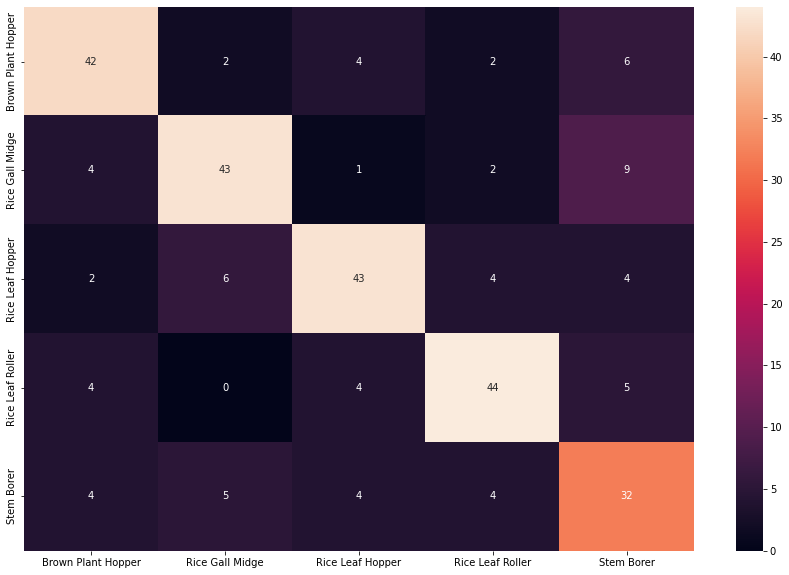

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_svm = model_svm_poly.predict(x_test_svm)
print("The predicted Data is :")
print(y_pred_svm)
print("The actual data is:")
print(np.array(y_test_svm))
print(f"The model is {accuracy_score(y_pred_svm,y_test_svm)*100}% accurate")

print("F1 Score: ", f1_score(y_pred_svm, np.array(y_test_svm), average='micro'))
print("Precision: ", precision_score(y_pred_svm, np.array(y_test_svm), average='micro'))
print("Recall: ", recall_score(y_pred_svm, np.array(y_test_svm), average='micro'))

cm=confusion_matrix(y_pred_svm, np.array(y_test_svm))
print("confusion matrix:", cm)

target_names = ["Brown Plant Hopper", "Rice Gall Midge", "Rice Leaf Hopper", "Rice Leaf Roller", "Stem Borer"]

array= cm
df_cm = pd.DataFrame(array, index = [i for i in target_names],
                  columns = [i for i in target_names])
plt.figure(figsize = (15,10))
sn.heatmap(df_cm, annot=True)
print(classification_report(y_test_svm, y_pred_svm, target_names=target_names))

In [ ]:
from yellowbrick.model_selection import LearningCurve

model_svm_linear = GridSearchCV(svc,param_grid_linear, n_jobs = -1)

visualizer = LearningCurve(model_svm_linear, scoring='r2')

x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(x_svm,y_svm,test_size=0.20,random_state=77,stratify=y_svm)
visualizer.fit(x_train_svm, y_train_svm)
# visualizer.show()  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

title = r"Learning Curves (SVM, linear kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.1, kernel = 'linear')
plot_learning_curve(estimator, title, copy.deepcopy(x_svm), copy.deepcopy(y_svm),
                    cv=cv, n_jobs=1)

plt.show()

In [ ]:
x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(x_svm,y_svm,test_size=0.20,random_state=77,stratify=y_svm)
print('Splitted Successfully')

model_svm_poly.fit(x_train_svm,y_train_svm)
print('The Model is trained well with the given images poly')

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_svm = model_svm_poly.predict(x_test_svm)
print("The predicted Data is :")
print(y_pred_svm)
print("The actual data is:")
print(np.array(y_test_svm))
print(f"The model is {accuracy_score(y_pred_svm,y_test_svm)*100}% accurate")

print("F1 Score: ", f1_score(y_pred_svm, np.array(y_test_svm), average='micro'))
print("Precision: ", precision_score(y_pred_svm, np.array(y_test_svm), average='micro'))
print("Recall: ", recall_score(y_pred_svm, np.array(y_test_svm), average='micro'))

cm=confusion_matrix(y_pred_svm, np.array(y_test_svm))
print("confusion matrix:", cm)

target_names = ["Brown Plant Hopper", "Rice Gall Midge", "Rice Leaf Hopper", "Rice Leaf Roller", "Stem Borer"]

array= cm
df_cm = pd.DataFrame(array, index = [i for i in target_names],
                  columns = [i for i in target_names])
plt.figure(figsize = (15,10))
sn.heatmap(df_cm, annot=True)

In [ ]:
from yellowbrick.model_selection import LearningCurve

model_svm_poly = GridSearchCV(svc,param_grid_poly, n_jobs = -1)

visualizer = LearningCurve(model_svm_poly, scoring='r2')

x_train_svm,x_test_svm,y_train_svm,y_test_svm=train_test_split(x_svm,y_svm,test_size=0.20,random_state=77,stratify=y_svm)
visualizer.fit(x_train_svm, y_train_svm)
# visualizer.show()   

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

title = r"Learning Curves (SVM, poly kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.1, kernel = 'poly')
plot_learning_curve(estimator, title, copy.deepcopy(x_svm), copy.deepcopy(y_svm),
                    cv=cv, n_jobs=1)

plt.show()